## Problem: Merge K sorted linked lists

You are given an array of `k` linked lists `lists`, where each list is sorted in ascending order.

Return the sorted linked list that is the result of merging all of the individual linked lists.

```
Input: lists = [[1,2,4],[1,3,5],[3,6]]
Output: [1,1,2,3,3,4,5,6]
```

The below neetcode solution is $O(log(k) * n)$ because we do about $logk$ steps of merging, and each merge operation takes about $O(n)$ where $n$ is the length of one linked list.

In [ ]:
from typing import List, Optional

# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    
    #break the k LLs into individual LLs, then merge from the ground up like in merge sort
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        #lists is null or empty LL
        if not lists or len(lists) == 0:
            return None

        #while its not yet a single coagulated LL
        while len(lists) > 1:
            mergedLists = []
            #take it pair by pair so increment 2
            for i in range(0, len(lists), 2):
                l1 = lists[i]
                #make sure the LL is in bounds
                l2 = lists[i + 1] if (i + 1) < len(lists) else None
                #add it to the new basket
                mergedLists.append(self.mergeList(l1, l2))
            #replace the old basket with the new basket
            lists = mergedLists
        #at this point its a single elem inside, return that one
        return lists[0]

    def mergeList(self, l1, l2):
        dummy = ListNode()
        tail = dummy

        while l1 and l2:
            if l1.val < l2.val:
                #connect the current last node to the new node
                tail.next = l1
                #break off l1; set the new l1 to be the next node in the LL
                l1 = l1.next
            else:
                tail.next = l2
                l2 = l2.next
            #move the tail forward
            tail = tail.next
        
        #link all the remaining elements, one of either l1 or l2 should be empty
        if l1:
            tail.next = l1
        if l2:
            tail.next = l2
        return dummy.next


My personal idea: before with 2 linked lists, we always take the min elem from both the LL. Now, we simply take the min elem at each time of all the `k` LL. We do this using a heap, by keeping track of all the bottom/root nodes of the LLs. So we just pop the min from the heap and push the next-in-line from that LL.

- the `id` prevents heapq from causing comparison problems. basically cannot compare 2 ListNode classes
- python default comparison of tuples is to compare first position of all tuples, then next position, next etc
- by adding an id before the ListNode position, we can make sure there are no errors since comparison doesnt even go to the ListNode position

While my solution is decent, its still a little slower than the Merge solution...

In [ ]:

import heapq


class Solution:

    # we heapify the (val, ListNode object)
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:

        #remove all null values
        lists= [x for x in lists if x is not None]

        # lists is null or empty LL, handle diff edge cases
        if not lists or len(lists)==0:
            return None

        # our first dummy node
        dummy = ListNode()
        tail = dummy

        # build the initial heap
        h = []
        for bottom in lists:
            heapq.heappush(h, (bottom.val, id(bottom), bottom))

        # start the popping/pushing

        # while at least one non-Null elem in the heap
        while h:
            print("length", len(h))
            # pop out the min object, which is the new node to consider
            new = heapq.heappop(h)[2]
            print("val", new.val)

            # link the current tail to the new node
            tail.next = new
            # move the tail pointer
            tail = tail.next

            # make sure this node still has stuff left ahead
            if new.next:
                # add in the new node's next node
                heapq.heappush(h, (new.next.val, id(new.next), new.next))
                
        return dummy.next


## Problem: Find Duplicate Integer

> Really interesting problem, good to know by heart!

You are given an array of integers nums containing `n + 1` integers. Each integer in nums is in the range `[1, n]` inclusive.

Every integer appears *exactly once*, *except* for one integer which appears *two or more* times. Return the integer that appears more than once.

**Case: No duplicates**

Suppose there is no duplicates, where we have an array of size `n` and each integer is in the range `[1,n]` inclusive. The array is indexed from `0` to `n-1`. Suppose we traverse the array using the *values* as indexes starting with the first value.

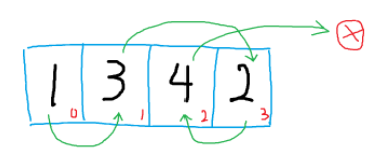

Then, we are guaranteed to arrive at the value `n`, as each value before we reach `n` will be from `0` to `n-1`, which are all valid indexes. When we do reach the value `n`, then we will go out of bounds as `n` is not a valid index. Hence there is no cycle and we will terminate our traversal somehow.

Note that this also means *at most*, we traverse the entire array and take `n` steps.

**Case: One duplicate**

If we had one duplicate, our array is of size `n+1` while each integer is still in the range `[1,n]` inclusive. This means that now, the elem with value `n` will point to a valid position - in other words, *all values in our array point to valid positions*. This inherently means *there will be a cycle*

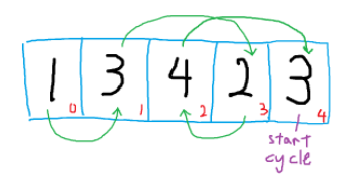

**Case: One duplicate value repeating multiple times**

Again, in this case, all elems will point to valid positions, and a cycle will definitely exist.

### Graph-Theoretic View

Now imagine in the single duplicate case, we represent this as a linked list.

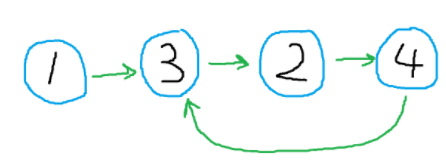

Suppose `k` is our duplicate value and we have two of it. Since these two `k`s exist at two different positions, this means two different positions are pointing to the same `k`th position - in other words there are 2 nodes pointing inwards to node `k`! This is the reason why a cycle exists.

> In linked lists, we can only have **one** outgoing node, but multiple nodes can point to the same node.

The below picture illustrates the case where a value is repeated more than once, or there are more than 2 nodes pointing inwards at `k`. We can also see this means `k` is our *start of cycle*.

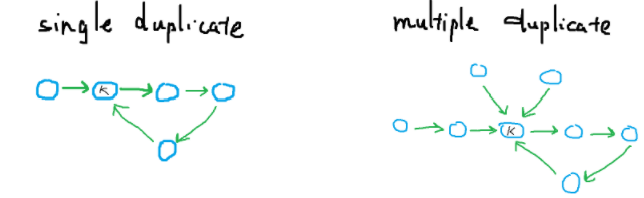

We can now use Floyd's algorithim to find the start of cycle and hence our duplicate.

In [5]:
class Solution:
    def findDuplicate(self, nums):
        slow, fast = 0, 0
        while True:
            slow = nums[slow]
            fast = nums[nums[fast]]
            if slow == fast:
                break

        slow2 = 0
        while True:
            slow = nums[slow]
            slow2 = nums[slow2]
            if slow == slow2:
                return slow
